OBSERVED TRENDS:
     - Suburban and rural drivers are shown to dedicate more time and miles per ride working for Pyber then their urban counterparts (their revenue share > driver share)
     - Urban rides are generally far shorter with lower fares, indicating that pyber has a more everyday and less occasional presence in the city.
     - The data is limited in scope, since there are only 1 or 2 rides entered per driver ID, but based on the data, we can see that the suburbs and rural areas are more lucrative places to work. 
    

In [1]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import CSVs that contain data on Pyber rides and the cities that use Pyber
cityFile = 'raw_data/city_data.csv'
rideFile = 'raw_data/ride_data.csv'

city_df = pd.DataFrame(pd.read_csv(cityFile))
ride_df = pd.DataFrame(pd.read_csv(rideFile))

print("The city dataframe contains information on each city: "+str(list(city_df)))
print("The ride dataframe contains information on individual Pyber rides: "+str(list(ride_df)))


The city dataframe contains information on each city: ['city', 'driver_count', 'type']
The ride dataframe contains information on individual Pyber rides: ['city', 'date', 'fare', 'ride_id']


In [3]:
# create a dataframe that contains all data necessary for bubble plot, indexed by city 
cityGroups = ride_df.groupby('city')

# create columns for number of rides and total revenue per city, then divide them into an Avg. Fare column
cityStats = pd.DataFrame({"total_revenue":cityGroups['fare'].sum(),"num_rides":cityGroups['city'].count()})
cityStats['avg_fare'] = round(cityStats['total_revenue']/cityStats['num_rides'],2)

#sort alphabetically and set city as index to easily join cityStats with the imported city_df dataframe
city_df = city_df.sort_values('city')
city_df = city_df.set_index('city')
cityStats = cityStats.join(city_df)

cityStats.head()

,num_rides,total_revenue,avg_fare,driver_count,type
city,,,,,
Alvarezhaven,31,741.79,23.93,21,Urban
Alyssaberg,26,535.85,20.61,67,Urban
Anitamouth,9,335.84,37.32,16,Suburban
Antoniomouth,22,519.75,23.62,21,Urban
Aprilchester,19,417.65,21.98,49,Urban


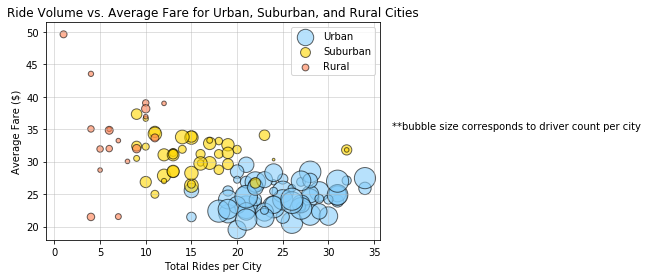

In [12]:
# BUBBLE PLOT

# set city type as index so we can break up the data into three subplots (one for each city type)
cityBreak = cityStats.set_index('type')
urbanStats = pd.DataFrame(cityBreak.loc['Urban',:])
suburbanStats = pd.DataFrame(cityBreak.loc['Suburban',:])
ruralStats = pd.DataFrame(cityBreak.loc['Rural',:])

# plot each subplot onto the figure, using different colors so they can be distinguished
fig,ax = plt.subplots()
ax.scatter(urbanStats['num_rides'],urbanStats['avg_fare'],c='lightskyblue',\
           s=[count*7 for count in urbanStats['driver_count']],\
           edgecolors='black',alpha=.6,label='Urban')

ax.scatter(suburbanStats['num_rides'],suburbanStats['avg_fare'],c='gold',\
           s=[count*7 for count in suburbanStats['driver_count']],\
           edgecolors='black',alpha=.6,label='Suburban') 

ax.scatter(ruralStats['num_rides'],ruralStats['avg_fare'],c='coral',\
           s=[count*7 for count in ruralStats['driver_count']],
           edgecolors='black',alpha=.6,label='Rural')

# beautify
plt.xlabel('Total Rides per City')
plt.ylabel('Average Fare ($)')
plt.grid(alpha=.5)
plt.legend()
plt.title("Ride Volume vs. Average Fare for Urban, Suburban, and Rural Cities")
plt.text(37,35,"**bubble size corresponds to driver count per city")
plt.show()



In [5]:
# PIE CHARTS
# aggregate data based on city type groups - Urban, Suburban, Rural
typeGroups = cityStats.groupby('type')
typeData = pd.DataFrame(typeGroups['driver_count'].sum())
typeData['total_revenue'] = typeGroups['total_revenue'].sum()
typeData['num_rides'] = typeGroups['num_rides'].sum()

# set display settings for pie charts
explode = (0,0,.1)
colors = ['gold','lightskyblue','coral']

typeData.head()

,driver_count,total_revenue,num_rides
type,,,
Rural,104,4255.09,125
Suburban,638,20335.69,657
Urban,2607,40078.34,1625


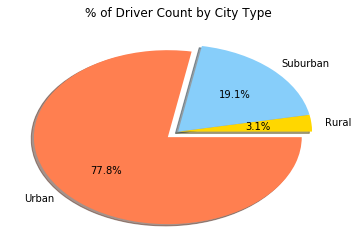

In [6]:
# show proportion of total drivers based on city type
plt.pie(typeData['driver_count'],explode=explode,colors=colors,labels=typeData.index,autopct='%1.1f%%',shadow=True)
plt.title('% of Driver Count by City Type')
plt.show()

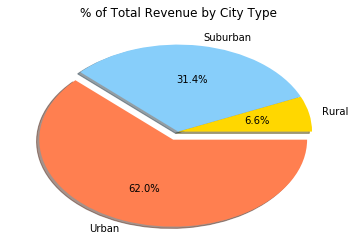

In [7]:
# show proportion of total revenue based on city type
plt.pie(typeData['total_revenue'],explode=explode,colors=colors,labels=typeData.index,autopct='%1.1f%%',shadow=True)
plt.title('% of Total Revenue by City Type')
plt.show()

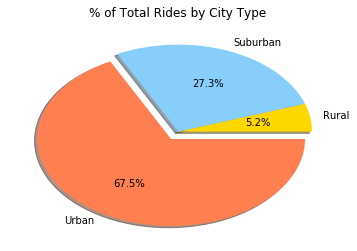

In [8]:
# show proportion of total rides based on city type
plt.pie(typeData['num_rides'],explode=explode,colors=colors,labels=typeData.index,autopct='%1.1f%%',shadow=True)
plt.title('% of Total Rides by City Type')
plt.show()